In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from time import time
%matplotlib inline

from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
df_full = pd.read_csv('Datasets/caravana/kick.csv')
df = df_full.copy()
df.head()

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,1260144000,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,11597,12409,?,?,21973,33619,FL,7100,0,1113
1,0,1260144000,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,11374,12791,?,?,19638,33619,FL,7600,0,1053
2,0,1260144000,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,7146,8702,?,?,19638,33619,FL,4900,0,1389
3,0,1260144000,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,...,4375,5518,?,?,19638,33619,FL,4100,0,630
4,0,1260144000,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,6739,7911,?,?,19638,33619,FL,4000,0,1020


In [3]:
num_samples, num_features = df.shape
num_features -=  1# correct for kick

# Primer

The goal of the dataset is to be able to classify whether the purchase of a vehicle is going to be a KICK (bad purchase) or not.

## IsBadBuy:

0... No

1... Yes

In [4]:
pd.isnull(df.any())

IsBadBuy                             False
PurchDate                            False
Auction                              False
VehYear                              False
VehicleAge                           False
Make                                 False
Model                                False
Trim                                 False
SubModel                             False
Color                                False
Transmission                         False
WheelTypeID                          False
WheelType                            False
VehOdo                               False
Nationality                          False
Size                                 False
TopThreeAmericanName                 False
MMRAcquisitionAuctionAveragePrice    False
MMRAcquisitionAuctionCleanPrice      False
MMRAcquisitionRetailAveragePrice     False
MMRAcquisitonRetailCleanPrice        False
MMRCurrentAuctionAveragePrice        False
MMRCurrentAuctionCleanPrice          False
MMRCurrentR

Conclusio: no missing values

In [5]:
df.describe()

,IsBadBuy,PurchDate,VehYear,VehicleAge,VehOdo,BYRNO,VNZIP1,IsOnlineSale,WarrantyCost
count,72983.000000,7.298300e+04,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.122988,1.263092e+09,2005.343052,4.176644,71499.995917,26345.842155,58043.059945,0.025280,1276.580985
std,0.328425,1.819602e+07,1.731252,1.712210,14578.913128,25717.351219,26151.640415,0.156975,598.846788
min,0.000000,1.231114e+09,2001.000000,0.000000,4825.000000,835.000000,2764.000000,0.000000,462.000000
25%,0.000000,1.248048e+09,2004.000000,3.000000,61837.000000,17212.000000,32124.000000,0.000000,837.000000
50%,0.000000,1.264032e+09,2005.000000,4.000000,73361.000000,19662.000000,73108.000000,0.000000,1155.000000
75%,0.000000,1.279066e+09,2007.000000,5.000000,82436.000000,22808.000000,80022.000000,0.000000,1623.000000
max,1.000000,1.293667e+09,2010.000000,9.000000,115717.000000,99761.000000,99224.000000,1.000000,7498.000000


In [6]:
def describe_cols(dataframe, n=3):
    for col in dataframe.columns:
        print("-"*40)
        print(f"Column: {col}")
        print(f"Top {n} vals")
        counts = dataframe[col].value_counts()
        print(counts.iloc[0:min(len(counts),3)])
        print("# of unique values: ", dataframe[col].nunique())

In [7]:
describe_cols(df)

----------------------------------------
Column: IsBadBuy
Top 3 vals
0    64007
1     8976
Name: IsBadBuy, dtype: int64
# of unique values:  2
----------------------------------------
Column: PurchDate
Top 3 vals
1290470400    384
1235520000    379
1291766400    372
Name: PurchDate, dtype: int64
# of unique values:  517
----------------------------------------
Column: Auction
Top 3 vals
MANHEIM    41043
OTHER      17501
ADESA      14439
Name: Auction, dtype: int64
# of unique values:  3
----------------------------------------
Column: VehYear
Top 3 vals
2006    17043
2005    15489
2007    11423
Name: VehYear, dtype: int64
# of unique values:  10
----------------------------------------
Column: VehicleAge
Top 3 vals
4    17013
3    15902
5    12956
Name: VehicleAge, dtype: int64
# of unique values:  10
----------------------------------------
Column: Make
Top 3 vals
CHEVROLET    17248
DODGE        12912
FORD         11305
Name: Make, dtype: int64
# of unique values:  33
----------------

# Features

Information is presented on almost all of the important vehicle and auction properties which could be of interest such as:

- Purchase date
- Auction
- Vehicle Production Year (similar to Vehicle Age)
- Maker
- Model
- Transmission
- Wheel types
- Odometer Status
- Size
- Buying Cost
- Warranty Cost
etc.


In [8]:
kick = df.columns[0]

count_classes = df[kick].value_counts()
count_classes

0    64007
1     8976
Name: IsBadBuy, dtype: int64

# Visualize data

In [9]:
from math import log2

Text(0.2, 0.8, 'Entropy= 0.538')

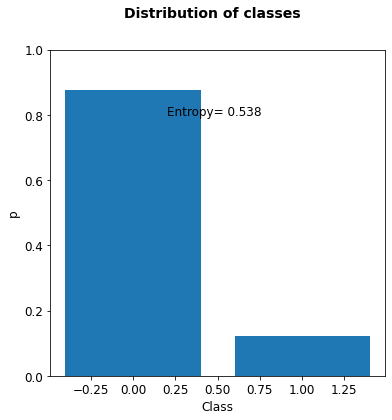

In [10]:
# For visualizations
df0=df[df[kick] == 0]
df1=df[df[kick] == 1]

dist_classes = count_classes.apply(lambda x: x/num_samples)
dist_classes.index


plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(6,6))
plt.bar(dist_classes.index, dist_classes)
plt.suptitle("Distribution of classes", fontsize=14, weight="bold")
plt.ylim((0,1))
plt.ylabel("p")
plt.xlabel("Class")

entropy = -sum([p*log2(p) for p in dist_classes])
plt.annotate(f"Entropy= {entropy:.3f}", (0.2, 0.8))

Good (Non-Kick) car purchases are preavalent.

For us, this means the dataset is skewed towards more isBadBuy = 0 samples.
The overall entropy of the set is 0.538, where entropy=1 would be a perfectly evenly distributed set.

In [11]:
df.loc[:,kick]

0        0
1        0
2        0
3        0
4        0
        ..
72978    1
72979    0
72980    0
72981    0
72982    0
Name: IsBadBuy, Length: 72983, dtype: int64

# Scale features

No scaling

In [23]:
X = df.drop("IsBadBuy", axis=1)
X = X.select_dtypes(exclude=['object'])
y = df["IsBadBuy"]

In [24]:
df.head()
df.info()
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   IsBadBuy                           72983 non-null  int64 
 1   PurchDate                          72983 non-null  int64 
 2   Auction                            72983 non-null  object
 3   VehYear                            72983 non-null  int64 
 4   VehicleAge                         72983 non-null  int64 
 5   Make                               72983 non-null  object
 6   Model                              72983 non-null  object
 7   Trim                               72983 non-null  object
 8   SubModel                           72983 non-null  object
 9   Color                              72983 non-null  object
 10  Transmission                       72983 non-null  object
 11  WheelTypeID                        72983 non-null  object
 12  Whee

,PurchDate,VehYear,VehicleAge,VehOdo,BYRNO,VNZIP1,IsOnlineSale,WarrantyCost
0,1260144000,2006,3,89046,21973,33619,0,1113
1,1260144000,2004,5,93593,19638,33619,0,1053
2,1260144000,2005,4,73807,19638,33619,0,1389
3,1260144000,2004,5,65617,19638,33619,0,630
4,1260144000,2005,4,69367,19638,33619,0,1020
...,...,...,...,...,...,...,...,...
72978,1259712000,2001,8,45234,18111,30212,0,993
72979,1259712000,2007,2,71759,18881,30212,0,1038
72980,1259712000,2005,4,88500,18111,30212,0,1893
72981,1259712000,2006,3,79554,18881,30212,0,1974


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# MLP Classifier

In [27]:
from sklearn.neural_network import MLPClassifier

l = 500
clf = MLPClassifier(max_iter=500,activation="relu",hidden_layer_sizes=(l,l,l),alpha=0.001)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
print("hidden_size: ",l,"score: ",accuracy_score(y_test, Y_pred))

Cost = clf.predict_proba(X_test)

hidden_size:  500 score:  0.8774606074446221


## Statistics

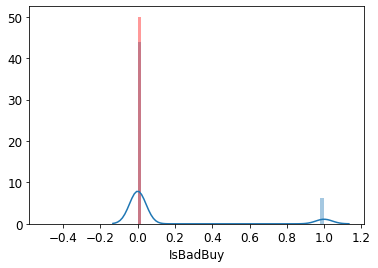

In [35]:
sns.distplot(y_test)
sns.distplot(Y_pred, color="red")

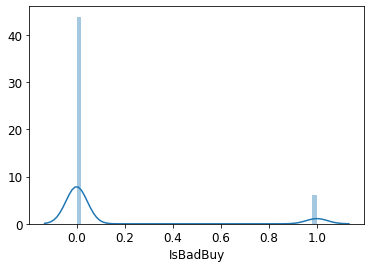

In [36]:
sns.distplot(y_test-Y_pred)

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print(sqrt(mean_squared_error(y_test, Y_pred)))

0.35005627055571786


# knn Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
X = df.drop("IsBadBuy", axis=1)
y = df["IsBadBuy"]

In [42]:
error_rate = []

for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i)) # maybe pointless?

Text(0, 0.5, 'Error rate')

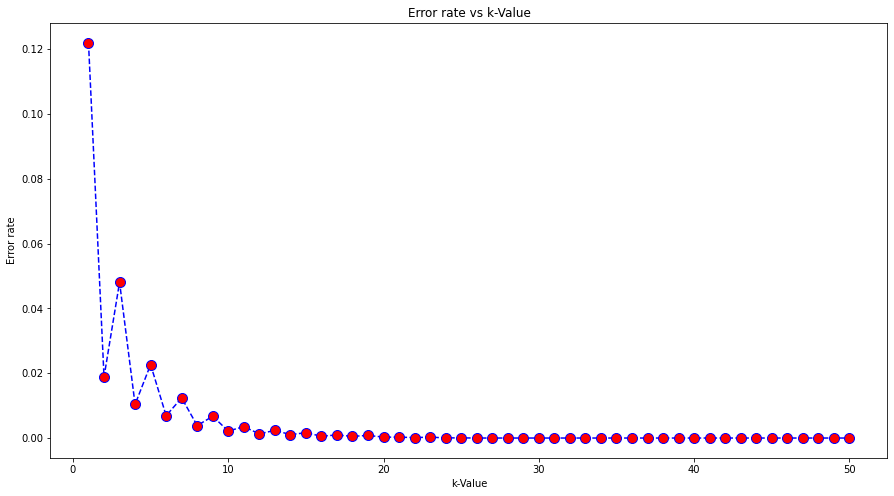

In [43]:
plt.figure(figsize=(15,8))
plt.plot(range(1,51), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs k-Value')
plt.xlabel('k-Value')
plt.ylabel('Error rate')

In [44]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': range(1, 51)}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=10)
model.fit(X_train, y_train)
print("Best k-Value is: ", model.best_params_['n_neighbors'])


Best k-Value is:  24


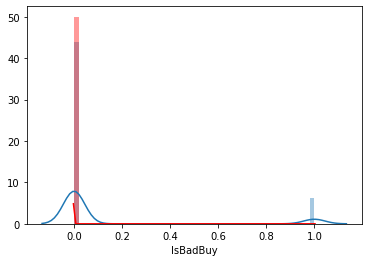

In [55]:
pred = model.predict(X_test)

solution_data = list(zip(list(range(750,1500)), pred))

solution_table = pd.DataFrame(solution_data, columns=['ID','IsBadBuys'])
solution_table.head()
sns.distplot(y_test)
sns.distplot(pred, color="red")

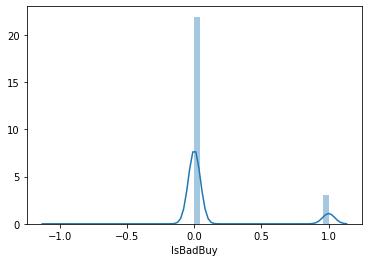

In [58]:
sns.distplot(y_test-pred)

In [59]:
print(sqrt(mean_squared_error(y_test, pred)))

0.3501215004585585


# Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rfc = RandomForestClassifier(n_estimators=900)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [69]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

precision    recall  f1-score   support

           0       0.88      0.99      0.93     19212
           1       0.26      0.02      0.04      2683

    accuracy                           0.87     21895
   macro avg       0.57      0.51      0.49     21895
weighted avg       0.80      0.87      0.82     21895

[[19041   171]
 [ 2624    59]]


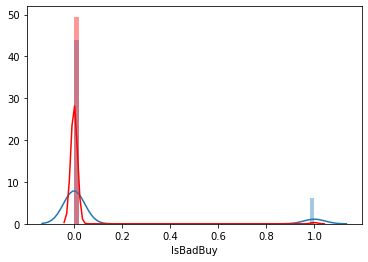

In [70]:
sns.distplot(y_test)
sns.distplot(pred_rfc, color="red")

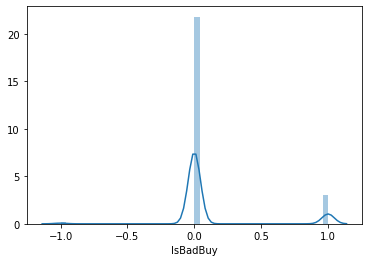

In [71]:
sns.distplot(y_test-pred_rfc)

In [72]:
print(sqrt(mean_squared_error(y_test, pred_rfc)))

0.3572880010418953
